<a href="https://colab.research.google.com/github/Sidhtang/30-day-ml-challenge-/blob/main/Deep_Reinforcement_Learning_for_Automated_Stock_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium
!pip install yfinance
!pip install stable-baselines3
import numpy as np
import pandas as pd
import yfinance as yf
from gymnasium import spaces
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, A2C, DDPG, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import BaseCallback

  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0a2
    Uninstalling gymnasium-1.0.0a2:
      Successfully uninstalled gymnasium-1.0.0a2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shimmy 2.0.0 requires gymnasium>=1.0.0a1, but you have gymnasium 0.29.1 which is incompatible.


In [ ]:
# List of stocks in the Dow Jones 30
tickers = [
    'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
]
tickers.remove('DOW')
tickers.remove('UTX')

# Get historical data from Yahoo Finance and save it to dictionary
def fetch_stock_data(tickers, start_date, end_date):
    stock_data = {}
    for ticker in tickers:
        stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Call the function to get data
stock_data = fetch_stock_data(tickers, '2009-01-01', '2020-05-08')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- Training data shape for AAPL: (1762, 6)
- Validation data shape for AAPL: (252, 6)
- Test data shape for AAPL: (842, 6)



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.737004,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.852516,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.805468,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.744846,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.795816,673500800


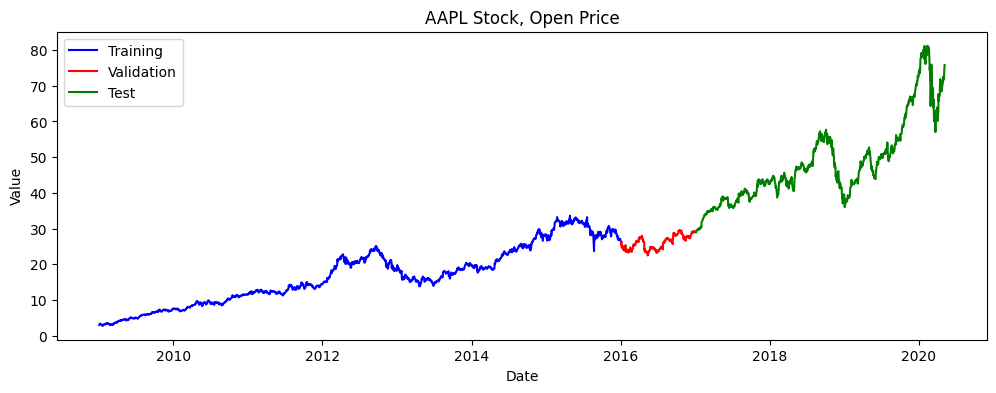

In [ ]:
training_data_time_range = ('2009-01-01', '2015-12-31')
validation_data_time_range = ('2016-01-01', '2016-12-31')
test_data_time_range = ('2017-01-01', '2020-05-08')
# split the data into training, validation and test sets
training_data = {}
validation_data = {}
test_data = {}
for ticker, df in stock_data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]
    validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]
    ticker = 'AAPL'
print(f'- Training data shape for {ticker}: {training_data[ticker].shape}')
print(f'- Validation data shape for {ticker}: {validation_data[ticker].shape}')
print(f'- Test data shape for {ticker}: {test_data[ticker].shape}\n')

# Display the first 5 rows of the data
display(stock_data['AAPL'].head())
print('\n')

# Plot:
plt.figure(figsize=(12, 4))
plt.plot(training_data[ticker].index, training_data[ticker]['Open'], label='Training', color='blue')
plt.plot(validation_data[ticker].index, validation_data[ticker]['Open'], label='Validation', color='red')
plt.plot(test_data[ticker].index, test_data[ticker]['Open'], label='Test', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{ticker} Stock, Open Price')
plt.legend()
plt.show()

In [ ]:
#essential key meric
#MACD (moving averagr convergence divergence)his indicator involves computing the 12-day and 26-day Exponential Moving Averages (EMAs) to determine the MACD line, and then applying a 9-day EMA to the MACD line to generate the Signal line.
#RSI rsi with a 14 day window to gauge the  momentum prices
#cci  This indicator assesses the deviation of the price from its average, which helps in identifying new trends or extreme conditions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def add_technical_indicators(df):

    df = df.copy()

    # Calculate EMA 12 and 26 for MACD
    df.loc[:, 'EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df.loc[:, 'EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df.loc[:, 'MACD'] = df['EMA12'] - df['EMA26']
    df.loc[:, 'Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    rsi_14_mode = True
    delta = df['Close'].diff()
    if rsi_14_mode:
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
    else:
        up = delta.where(delta > 0, 0)
        down = -delta.where(delta < 0, 0)
        rs = up.rolling(window=14).mean() / down.rolling(window=14).mean()
    df.loc[:, 'RSI'] = 100 - (100 / (1 + rs))

    # Calculate CCI 20
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df.loc[:, 'CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # Calculate ADX 14
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df.loc[:, '+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df.loc[:, '-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], np.abs(df['High'] - df['Close'].shift(1)), np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df.loc[:, '+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df.loc[:, '-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df.loc[:, 'ADX'] = dx.ewm(span=14, adjust=False).mean()

    # Drop NaN values
    df.dropna(inplace=True)

    # Keep only the required columns
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    return df
    # add technical indicators to the training data for each stock
for ticker, df in training_data.items():
    training_data[ticker] = add_technical_indicators(df)

# add technical indicators to the validation data for each stock
for ticker, df in validation_data.items():
    validation_data[ticker] = add_technical_indicators(df)

# add technical indicators to the test data for each stock
for ticker, df in test_data.items():
    test_data[ticker] = add_technical_indicators(df)

# print the first 5 rows of the data
print(f'- Training data shape for {ticker}: {training_data[ticker].shape}')
print(f'- Validation data shape for {ticker}: {validation_data[ticker].shape}')
print(f'- Test data shape for {ticker}: {test_data[ticker].shape}\n')

display(test_data[ticker].head())



- Training data shape for XOM: (1743, 10)
- Validation data shape for XOM: (233, 10)
- Test data shape for XOM: (823, 10)



,Open,High,Low,Close,Volume,MACD,Signal,RSI,CCI,ADX
Date,,,,,,,,,,
2017-01-31,85.040001,85.070000,83.129997,83.889999,19128100,-1.375811,-1.292896,39.171959,-127.861674,45.958728
2017-02-01,84.000000,84.160004,82.540001,82.940002,15111800,-1.484706,-1.331258,29.610121,-160.110316,43.789979
2017-02-02,83.209999,83.529999,82.550003,83.449997,12200100,-1.512420,-1.367491,34.837333,-153.801977,42.081047
2017-02-03,83.699997,83.720001,82.900002,83.540001,12746300,-1.509717,-1.395936,35.379803,-135.801428,44.498917
2017-02-06,83.550003,83.650002,82.930000,83.309998,9938200,-1.508743,-1.418497,27.066766,-129.114232,46.807713


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install gym

In [ ]:
import gymnasium as gym
class StockTradingEnv(gym.Env):

    metadata = {'render_modes': ['human']}

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def __init__(self, stock_data, transaction_cost_percent=0.005):
        super(StockTradingEnv, self).__init__()
        """
        This function initializes the environment with stock data and sets up necessary variables:
        - Action and Observation Space: Defines the action space (buy/sell/hold) and
                                        observation space (stock prices, balance, shares held, net worth, etc.).
        - Account Variables: Initializes balance, net worth, shares held, and transaction costs.
        """

        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All provided stock data is empty")

        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)

        # Observation space: price data for each stock + balance + shares held + net worth + max net worth + current step
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        # Initialize account balance
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}

        # Set the current step
        self.current_step = 0

        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Transaction cost
        self.transaction_cost_percent = transaction_cost_percent

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        """ Resets the environment to its initial state for a new episode. """

        # Reset the account balance
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def _next_observation(self):
        """ Returns the current state of the environment, including stock prices, balance, shares held, net worth, etc. """

        # initialize the frame
        frame = np.zeros(self.obs_shape)

        # Add stock data for each ticker
        idx = 0
        # Loop through each ticker
        for ticker in self.tickers:
            # Get the DataFrame for the current ticker
            df = self.stock_data[ticker]
            # If the current step is less than the length of the DataFrame, add the price data for the current step
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            # Otherwise, add the last price data available
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            # Move the index to the next ticker
            idx += self.n_features

        # Add balance, shares held, net worth, max net worth, and current step
        frame[-4-len(self.tickers)] = self.balance # Balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers] # Shares held
        frame[-3] = self.net_worth # Net worth
        frame[-2] = self.max_net_worth # Max net worth
        frame[-1] = self.current_step # Current step

        return frame

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def step(self, actions):
        """ Executes an action in the environment, updates the state, calculates rewards, and checks if the episode is done. """

        # update the current step
        self.current_step += 1

        # check if we have reached the maximum number of steps
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}

        current_prices = {}
        # Loop through each ticker and perform the action
        for i, ticker in enumerate(self.tickers):
            # Get the current price of the stock
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            # get the action for the current ticker
            action = actions[i]

            if action > 0:  # Buy
                # Calculate the number of shares to buy
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                # Calculate the cost of the shares
                cost = shares_to_buy * current_prices[ticker]
                # Transaction cost
                transaction_cost = cost * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance -= (cost + transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] += shares_to_buy

            elif action < 0:  # Sell
                # Calculate the number of shares to sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                # Calculate the sale value
                sale = shares_to_sell * current_prices[ticker]
                # Transaction cost
                transaction_cost = sale * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance += (sale - transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] -= shares_to_sell
                # Update the shares sold
                self.total_shares_sold[ticker] += shares_to_sell
                # Update the total sales value
                self.total_sales_value[ticker] += sale

        # Calculate the net worth
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)

        # Update the max net worth
        self.max_net_worth = max(self.net_worth, self.max_net_worth)

        # Calculate the reward
        reward = self.net_worth - self.initial_balance

        # Check if the episode is done
        done = self.net_worth <= 0 or self.current_step >= self.max_steps

        obs = self._next_observation()
        return obs, reward, done, False, {}

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def render(self, mode='human'):
        """ Displays the current state of the environment in a human-readable format. """

        # Print the current step, balance, shares held, net worth, and profit
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        """ Placeholder for any cleanup operations """
        pass


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class PolicyGradientLossCallback(BaseCallback):
    """
    A custom callback class that logs the policy_gradient_loss during training.
    This class extends BaseCallback and used to capture and store the metrics we want.
    """

    def __init__(self, verbose=0):
        super(PolicyGradientLossCallback, self).__init__(verbose)
        self.losses = []

    def _on_step(self) -> bool:
        if hasattr(self.model, 'logger'):
            logs = self.model.logger.name_to_value
            if 'train/policy_gradient_loss' in logs:
                loss = logs['train/policy_gradient_loss']
                self.losses.append(loss)
        return True

    def _on_training_end(self):
        """ Plot the loss after training ends """
        name = self.model.__class__.__name__
        plt.figure(figsize=(12, 4))
        plt.plot(self.losses, label='Policy Gradient Loss')
        plt.title(f'{name} - Policy Gradient Loss During Training')
        plt.xlabel('Training Steps')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [ ]:
# Define PPO Agent
class PPOAgent:

    def __init__(self, env, total_timesteps, threshold):
        self.model = PPO("MlpPolicy", env, verbose=1)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)
        self.threshold = threshold

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def predict(self, obs):
        action, _ = self.model.predict(obs, deterministic=True)
        return action

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def action_to_recommendation(self, action):
        recommendations = []
        for a in action:
            if a > self.threshold:
                recommendations.append('buy')
            elif a < -self.threshold:
                recommendations.append('sell')
            else:
                recommendations.append('hold')
        return recommendations

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def validate(self, env):
        obs = env.reset()
        total_rewards = 0
        for _ in range(1000):  # Adjust based on needs
            action, _ = self.model.predict(obs)
            obs, reward, done, _ = env.step(action)
            total_rewards += reward
            if done:
                obs = env.reset()
        print(f'Agent Validation Reward: {total_rewards}')

# -----------------------------------------------------------------------------

# Define A2C Agent
class A2CAgent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = A2C("MlpPolicy", env, verbose=1)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define DDPG Agent
class DDPGAgent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = DDPG("MlpPolicy", env, verbose=1)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define SAC Agent
class SACAgent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = SAC("MlpPolicy", env, verbose=1)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define TD3 Agent
class TD3Agent(PPOAgent):
    def __init__(self, env, total_timesteps, threshold):
        super().__init__(env, total_timesteps, threshold)
        self.model = TD3("MlpPolicy", env, verbose=1)
        self.callback = PolicyGradientLossCallback()
        self.model.learn(total_timesteps=total_timesteps, callback=self.callback)

# -----------------------------------------------------------------------------

# Define Ensemble Agent
class EnsembleAgent:

    def __init__(self, ppo_model, a2c_model, ddpg_model, sac_model, td3_model, threshold):
        self.ppo_model = ppo_model
        self.a2c_model = a2c_model
        self.ddpg_model = ddpg_model
        self.sac_model = sac_model
        self.td3_model = td3_model
        self.threshold = threshold

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def predict(self, obs):
        ppo_action, _ = self.ppo_model.predict(obs, deterministic=True)
        a2c_action, _ = self.a2c_model.predict(obs, deterministic=True)
        ddpg_action, _ = self.ddpg_model.predict(obs, deterministic=True)
        sac_action, _ = self.sac_model.predict(obs, deterministic=True)
        td3_action, _ = self.td3_model.predict(obs, deterministic=True)

        # Average the actions
        ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action, sac_action, td3_action], axis=0)
        return ensemble_action

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def action_to_recommendation(self, action):
        recommendations = []
        for a in action:
            if a > self.threshold:
                recommendations.append('buy')
            elif a < -self.threshold:
                recommendations.append('sell')
            else:
                recommendations.append('hold')
        return recommendations

    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    def validate(self, env):
        obs = env.reset()
        total_rewards = 0
        for _ in range(1000):  # Adjust based on needs
            action = self.predict(obs)
            obs, reward, done, _ = env.step(action)
            total_rewards += reward
            if done:
                obs = env.reset()
        print(f'Agent Validation Reward: {total_rewards}')

In [ ]:
# Function to create the environment and train the agents
def create_env_and_train_agents(train_data, val_data, total_timesteps, threshold):

    # Create environments for training and validation
    train_env = DummyVecEnv([lambda: StockTradingEnv(train_data)])
    val_env = DummyVecEnv([lambda: StockTradingEnv(val_data)])

    # Train and Validate PPO Agent
    ppo_agent = PPOAgent(train_env, total_timesteps, threshold)
    ppo_agent.validate(val_env)

    # Train and Validate A2C Agent
    a2c_agent = A2CAgent(train_env, total_timesteps, threshold)
    a2c_agent.validate(val_env)

    # Train and Validate DDPG Agent
    ddpg_agent = DDPGAgent(train_env, total_timesteps, threshold)
    ddpg_agent.validate(val_env)

    # Train and Validate SAC Agent
    sac_agent = SACAgent(train_env, total_timesteps, threshold)
    sac_agent.validate(val_env)

    # Train and Validate TD3 Agent
    td3_agent = TD3Agent(train_env, total_timesteps, threshold)
    td3_agent.validate(val_env)

    # Train and Validate the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model,
                                   sac_agent.model, td3_agent.model, threshold)
    ensemble_agent.validate(val_env)

    return train_env, val_env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent

# -----------------------------------------------------------------------------

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers,
                        show_balance=True, show_net_worth=True, show_shares_held=True):

    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
#function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):

    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

In [ ]:
def test_and_visualize_agents(env, agents, data, n_tests=1000):

    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, data, n_tests=n_tests, visualize=True)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

def compare_and_plot_agents(agents_metrics, labels, risk_free_rate=0.0):

    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:

            net_worths = metrics['net_worths']

            # Calculate daily returns
            daily_returns = np.diff(net_worths) / net_worths[:-1]
            avg_return = np.mean(daily_returns)
            std_return = np.std(daily_returns)
            sharpe_ratio = ((avg_return - risk_free_rate) / std_return) if std_return != 0 else 'Inf'

            returns.append(avg_return)
            stds.append(std_return)
            sharpe_ratios.append(sharpe_ratio)

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)

    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

In [ ]:
!pip install gymnasium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gymnasium as gym

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 90   |
|    iterations      | 1    |
|    time_elapsed    | 22   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 98          |
|    iterations           | 2           |
|    time_elapsed         | 41          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007116522 |
|    clip_fraction        | 0.0575      |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.7       |
|    explained_variance   | 2.42e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 4.68e+07    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0121     |
|    std                  | 1           |
|    value_loss           | 1.05e+08    |
----------------

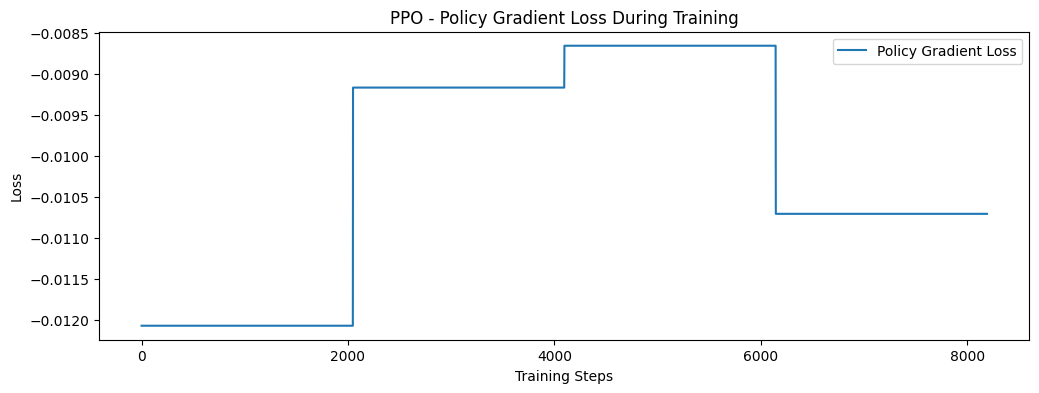

Agent Validation Reward: [-112711.92]
Using cuda device
-----------------------------
| time/              |      |
|    fps             | 132  |
|    iterations      | 1    |
|    time_elapsed    | 15   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 122          |
|    iterations           | 2            |
|    time_elapsed         | 33           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0071064434 |
|    clip_fraction        | 0.0508       |
|    clip_range           | 0.2          |
|    entropy_loss         | -39.7        |
|    explained_variance   | 1.97e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 4.79e+07     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0121      |
|    std                  | 0.999        |
|  

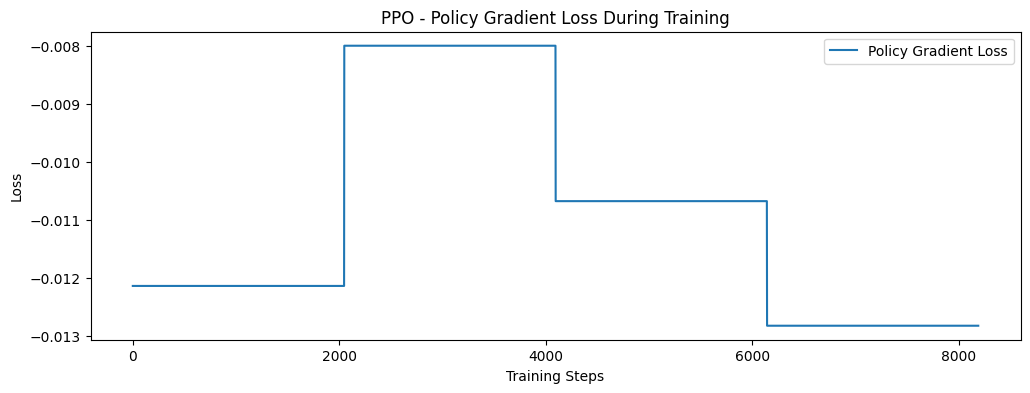

Using cuda device
------------------------------------
| time/                 |          |
|    fps                | 125      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -39.8    |
|    explained_variance | 0.00243  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 2.06e+04 |
|    std                | 1        |
|    value_loss         | 3.65e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 127      |
|    iterations         | 200      |
|    time_elapsed       | 7        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -39.6    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss    

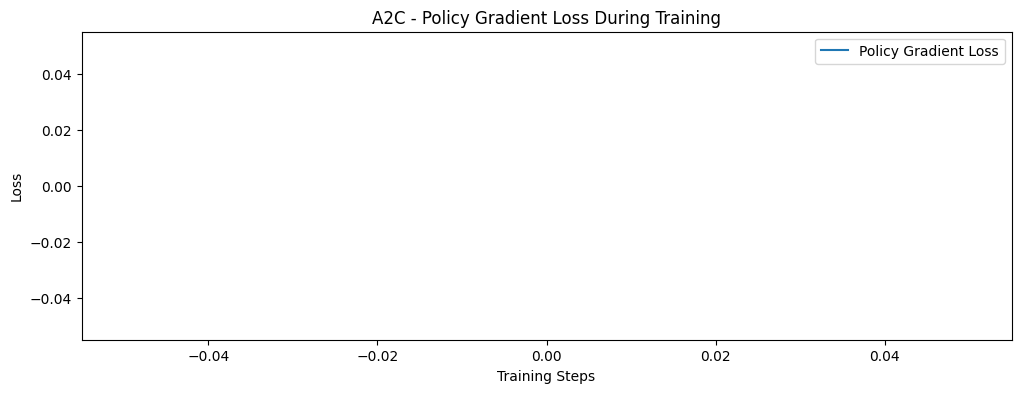

Agent Validation Reward: [137617.62]
Using cuda device
-----------------------------
| time/              |      |
|    fps             | 144  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 135          |
|    iterations           | 2            |
|    time_elapsed         | 30           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0065606795 |
|    clip_fraction        | 0.044        |
|    clip_range           | 0.2          |
|    entropy_loss         | -39.7        |
|    explained_variance   | 2.48e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 4.68e+07     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00848     |
|    std                  | 1            |
|   

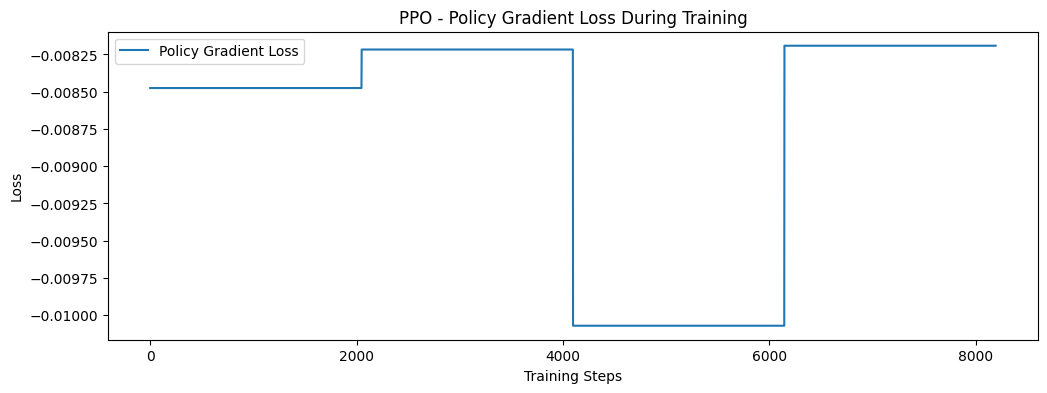

Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 63       |
|    time_elapsed    | 109      |
|    total_timesteps | 6968     |
| train/             |          |
|    actor_loss      | 1.33e+06 |
|    critic_loss     | 2.74e+10 |
|    learning_rate   | 0.001    |
|    n_updates       | 6867     |
---------------------------------


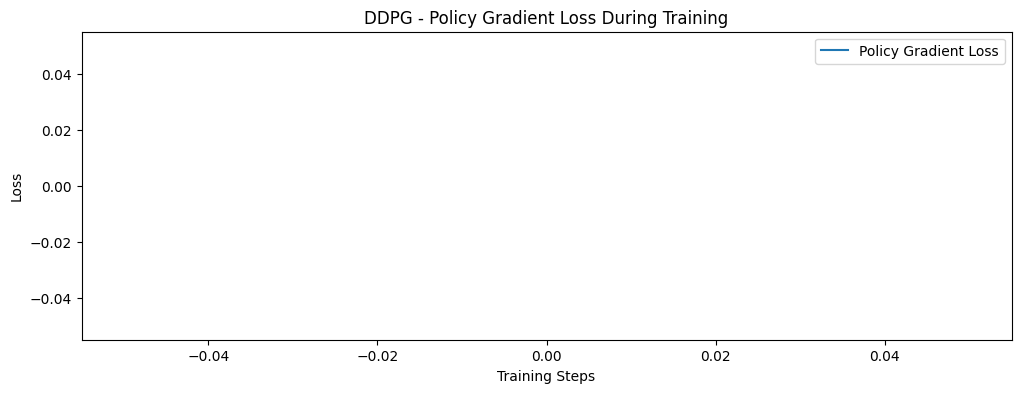

Agent Validation Reward: [179289.25]
Using cuda device
-----------------------------
| time/              |      |
|    fps             | 139  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 131          |
|    iterations           | 2            |
|    time_elapsed         | 31           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0060721673 |
|    clip_fraction        | 0.0314       |
|    clip_range           | 0.2          |
|    entropy_loss         | -39.7        |
|    explained_variance   | 4.17e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 6.29e+07     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00876     |
|    std                  | 1            |
|   

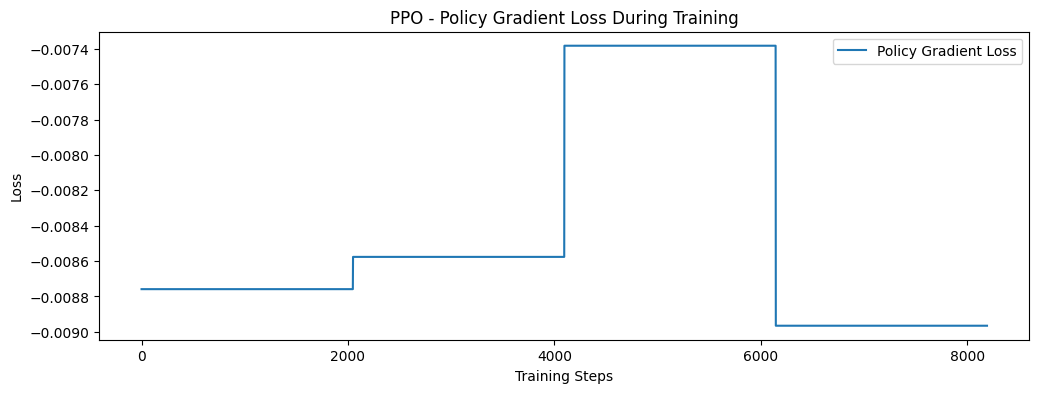

Using cuda device
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 45        |
|    time_elapsed    | 153       |
|    total_timesteps | 6968      |
| train/             |           |
|    actor_loss      | -2.1e+05  |
|    critic_loss     | 2.19e+09  |
|    ent_coef        | 7.77      |
|    ent_coef_loss   | -1.17e+03 |
|    learning_rate   | 0.0003    |
|    n_updates       | 6867      |
----------------------------------


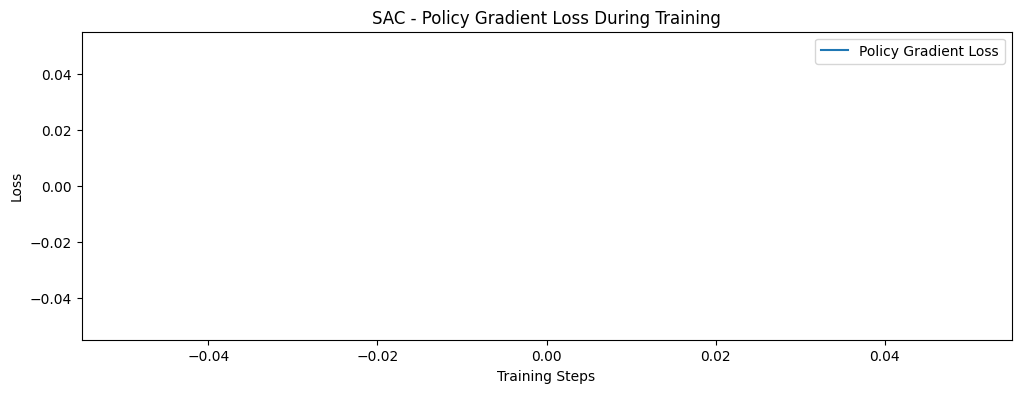

Agent Validation Reward: [144438.2]
Using cuda device
-----------------------------
| time/              |      |
|    fps             | 138  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 131         |
|    iterations           | 2           |
|    time_elapsed         | 31          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006874831 |
|    clip_fraction        | 0.0473      |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.7       |
|    explained_variance   | 7.15e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 5.87e+07    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0111     |
|    std                  | 1           |
|    value_loss       

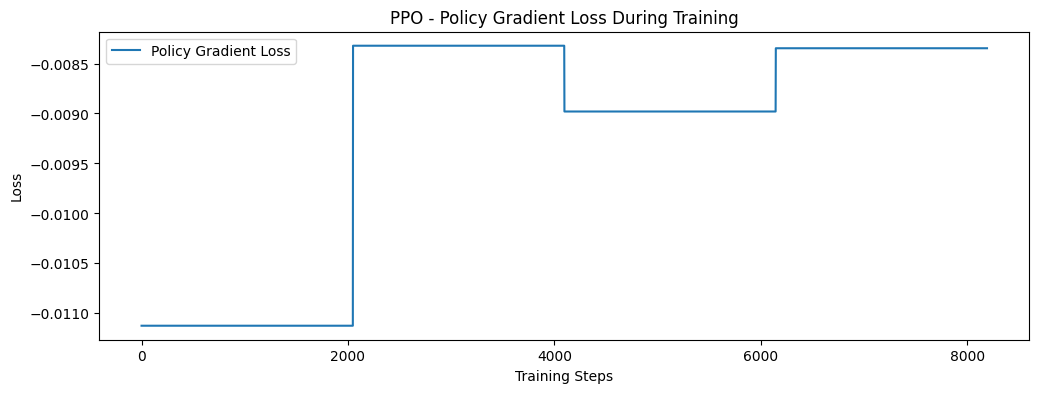

Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 68       |
|    time_elapsed    | 101      |
|    total_timesteps | 6968     |
| train/             |          |
|    actor_loss      | 3.97e+05 |
|    critic_loss     | 1.24e+10 |
|    learning_rate   | 0.001    |
|    n_updates       | 6867     |
---------------------------------


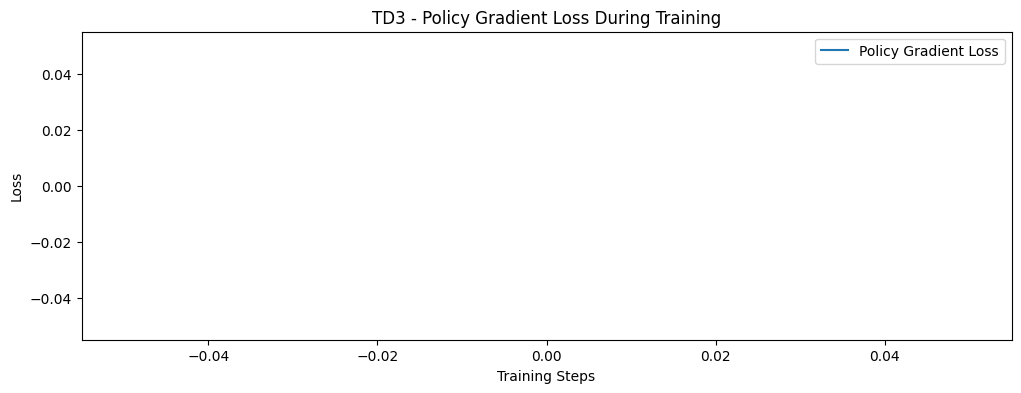

Agent Validation Reward: [237222.12]
Agent Validation Reward: [90139.664]


In [ ]:
# Create the environment and train the agents
threshold = 0.1
total_timesteps = 10000
train_env, val_env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent = \
  create_env_and_train_agents(training_data, validation_data, total_timesteps, threshold)



NameError: name 'test_agent' is not defined

In [ ]:
print(dir()) # This will print a list of all defined names in the current scope

['A2C', 'A2CAgent', 'BaseCallback', 'DDPG', 'DDPGAgent', 'Dict', 'DummyVecEnv', 'EnsembleAgent', 'In', 'MyEnvironment', 'Out', 'PPO', 'PPOAgent', 'PolicyGradientLossCallback', 'SAC', 'SACAgent', 'StockTradingEnv', 'TD3', 'TD3Agent', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'a2c_agent', 'add_technical_indicators', 'agents', 'compare_and_plot_agents', 'create_env_and_train_agents', 'ddpg_agent', 'df', 'ensemble_agent', 'exit', 'fetch_stock_data', 'get_ipython', 'gym', 'n_tests', 'np', 'pd', 'plt', 'ppo_agent', 'quit', 'sac_agent', 'spaces', 'stock_data', 'td3_agent', 'test_and_visualize_agents', 'test_data', 'test_data_

In [ ]:
def prepare_next_day_data(stock_data):
    """ Prepares the observation for the next trading day """

    # Initialize the environment with the current stock data
    env = StockTradingEnv(stock_data)
    env.reset()

    # Prepare the next day's observation
    next_day_observations = env._next_observation()

    return next_day_observations

# -----------------------------------------------------------------------------

def generate_next_day_recommendations(agents, next_day_observation):
    """ Generate recommendations for the next trading day using the trained agents """

    recommendations = {agent_name: [] for agent_name in agents.keys()}

    for agent_name, agent in agents.items():
        action = agent.predict(next_day_observation)
        recs = agent.action_to_recommendation(action)
        recommendations[agent_name] = zip(recs, action)

    return recommendations

# -----------------------------------------------------------------------------

# Prepare next day's observation
next_day_observation = prepare_next_day_data(test_data)

# Generate recommendations for the next trading day
recommendations = generate_next_day_recommendations(agents, next_day_observation)

# Print or display recommendations
for agent_name, recs in recommendations.items():
  if agent_name == 'Ensemble Agent':
      print(f'\nRecommendations for {agent_name}:')
      for ticker, recommendation in zip(tickers, recs):
          print(f"{ticker}: {recommendation}")
The corresponding results shall be as following:

